In [28]:
# libraries

import os
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [29]:
warnings.filterwarnings("ignore")
sns.set_theme()

In [30]:
# Get WD
working_directory = os.getcwd()
print(working_directory)

/Users/dperond/Repositories/maizegxeprediction2022/workspace/Daniel


In [31]:
# Load training data
trait_training_data = pd.read_csv(working_directory + "/../../data/raw/Training_Data/1_Training_Trait_Data_2014_2021.csv")
meta_training_data = pd.read_csv(working_directory + "/../../data/raw/Training_Data/2_Training_Meta_Data_2014_2021.csv", encoding='cp1252')
soil_training_data = pd.read_csv(working_directory + "/../../data/raw/Training_Data/3_Training_Soil_Data_2015_2021.csv")
weather_training_data = pd.read_csv(working_directory + "/../../data/raw/Training_Data/4_Training_Weather_Data_2014_2021.csv")
ec_training_data = pd.read_csv(working_directory + "/../../data/raw/Training_Data/6_Training_EC_Data_2014_2021.csv")
hybrids_data = pd.read_csv(working_directory + "/../../data/raw/Training_Data/All_hybrid_names_info.csv")

In [32]:
# Load test data
submit_template = pd.read_csv(working_directory + "/../../data/raw/Testing_Data/1_Submission_Template_2022.csv")
meta_testing_data = pd.read_csv(working_directory + "/../../data/raw/Testing_Data/2_Testing_Meta_Data_2022.csv")
soil_testing_data = pd.read_csv(working_directory + "/../../data/raw/Testing_Data/3_Testing_Soil_Data_2022.csv")
weather_testing_data = pd.read_csv(working_directory + "/../../data/raw/Testing_Data/4_Testing_Weather_Data_2022.csv")
ec_testing_data = pd.read_csv(working_directory + "/../../data/raw/Testing_Data/6_Testing_EC_Data_2022.csv")

## Train enviroments across US

In [33]:
# Train env across US
fig = px.scatter_mapbox(meta_training_data, 
                        lat='Weather_Station_Latitude (in decimal numbers NOT DMS)', 
                        lon='Weather_Station_Longitude (in decimal numbers NOT DMS)', 
                        hover_name="City",
                        zoom=3, 
                        height=400,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Test enviroments across US

In [34]:
# Read data
meta_testing_data = pd.read_csv(working_directory + "/../../data/raw/Testing_Data/2_Testing_Meta_Data_2022.csv")

# Test envs across US
fig = px.scatter_mapbox(meta_testing_data, 
                        lat='Weather_Station_Latitude (in decimal numbers NOT DMS)', 
                        lon='Weather_Station_Longitude (in decimal numbers NOT DMS)',
                        hover_name="City",
                        zoom=3, 
                        height=400,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Hybrids and Enviroments

In [35]:
print('Percentage of hybrids with VCF data:', round((hybrids_data[hybrids_data['vcf'] == True].shape[0]/hybrids_data.shape[0]) * 100,2), '%')

Percentage of hybrids with VCF data: 94.99 %


In [56]:
# Hybrids in test dataset that are in the training dataset

training_hybrids = set(trait_training_data['Hybrid'].values.tolist())
test_hybrids = set(submit_template['Hybrid'].values.tolist())

hybrids_inter = set(test_hybrids).intersection(set(training_hybrids))
hybrids_diff = set(test_hybrids).difference(set(training_hybrids))

print("Number of hybrids present in the training and present in the test: ", str(len(hybrids_inter)))
print(hybrids_inter)

print("\n")

print("Number of hybrids NOT present in the training and present in the test: ", str(len(hybrids_diff)))
print(hybrids_diff)

Number of hybrids present in the training and present in the test:  43
{'LH195/MO17', 'B73/PHK76', 'PHB47/PHZ51', 'B37/MO17', 'PHRE1/PHTD5', 'TX951/LH195', 'LH195/PHK76', 'LH244/MO17', 'LH244/PHK76', 'LH195/PHZ51', 'PHB47/PHN82', 'LH145/LH82', 'B14A/OH43', 'PHW52/PHN82', 'PHB47/PHK76', 'CG44/CGR01', 'TX714/TX779', 'B73/TX779', 'B73/MO17', 'B73/PHZ51', 'TX714/PHZ51', 'B73/PHN82', 'LH195/PHN82', 'LH74/PHN82', 'B14A/MO17', 'PHG29/PHG47', 'B37/H95', 'TX777/LH195', 'B14A/H95', 'F42/MO17', 'LH244/PHN82', 'LH244/PHZ51', 'F42/OH43', 'TX779/LH195', 'PHG39/PHN82', 'PHJ40/PHAJ0', 'CG119/CG108', 'PHB47/MO17', 'PHJ89/PH207', 'B73/PHM49', 'B37/OH43', 'PHW52/PHM49', 'F42/H95'}


Number of hybrids NOT present in the training and present in the test:  505
{'GEMN-0135/LH244', 'W10010_0018/LH244', 'NC360/LH244', 'GEMN-0225_PHJ89_0009/LH244', 'GEMN-0192_PHN46_0020/LH244', 'GEMN-0225_LH212HT_0006/LH244', 'GEMN-0225_PHJ89_0008/LH244', 'W10010_0464/LH244', 'W10001_0036/LH244', 'GEMN-0225_PHN46_0001/LH244', '

In [57]:
# Enviroments in test dataset that are in the training dataset

trait_training_data[['Experiment_Code','Year']] = trait_training_data['Env'].str.rsplit("_", 1, expand=True)
submit_template[['Experiment_Code','Year']] = submit_template['Env'].str.rsplit("_", 1, expand=True)

training_envs = set(trait_training_data['Experiment_Code'].values.tolist())
test_envs= set(submit_template['Experiment_Code'].values.tolist())

envs_inter = set(test_envs).intersection(set(training_envs))
envs_diff = set(test_envs).difference(set(training_envs))

print("Number of envs present in the training and present in the test: ", str(len(envs_inter)))
print(envs_inter)

print("\n")

print("Number of envs NOT present in the training and present in the test: ", str(len(envs_diff)))
print(envs_diff)

Number of envs present in the training and present in the test:  26
{'IAH1', 'ILH1', 'MIH1', 'GAH1', 'WIH2', 'NYH3', 'NEH2', 'TXH2', 'TXH3', 'NYH2', 'TXH1', 'DEH1', 'NEH3', 'INH1', 'WIH1', 'SCH1', 'MOH2', 'IAH3', 'NEH1', 'GAH2', 'IAH2', 'WIH3', 'IAH4', 'MNH1', 'OHH1', 'NCH1'}


Number of envs NOT present in the training and present in the test:  0
set()


## NA on training data

In [37]:
print("\nCount total NaN at each column in a trait_training_data : \n\n", trait_training_data.isnull().sum())


Count total NaN at each column in a trait_training_data : 

 Env                         0
Year                        0
Field_Location              0
Experiment                  0
Replicate                   0
Block                       0
Plot                        0
Range                   18725
Pass                    18315
Hybrid                      0
Hybrid_orig_name            0
Hybrid_Parent1           1619
Hybrid_Parent2           1619
Plot_Area_ha                1
Date_Planted              362
Date_Harvested           1125
Stand_Count_plants      11653
Pollen_DAP_days         30497
Silk_DAP_days           32880
Plant_Height_cm         15561
Ear_Height_cm           15544
Root_Lodging_plants     59641
Stalk_Lodging_plants    48188
Yield_Mg_ha              7845
Grain_Moisture           7770
Twt_kg_m3               27952
dtype: int64


In [38]:
print("\nCount total NaN at each column in a meta_training_data : \n\n", meta_training_data.isnull().sum())


Count total NaN at each column in a meta_training_data : 

 Year                                                                    0
Env                                                                     0
Experiment_Code                                                         0
Treatment                                                              56
City                                                                    5
Farm                                                                   56
Field                                                                  87
Trial_ID (Assigned by collaborator for internal reference)            114
Soil_Taxonomic_ID and horizon description, if known                   157
Weather_Station_Serial_Number (Last four digits, e.g. m2700s#####)     20
Weather_Station_Latitude (in decimal numbers NOT DMS)                  21
Weather_Station_Longitude (in decimal numbers NOT DMS)                 21
Date_weather_station_placed                        

In [39]:
print("\nCount total NaN at each column in a soil_training_data : \n\n", soil_training_data.isnull().sum())


Count total NaN at each column in a soil_training_data : 

 Year                            0
Env                             0
LabID                           0
Date Received                  17
Date Reported                   0
E Depth                        15
1:1 Soil pH                     2
WDRF Buffer pH                 19
1:1 S Salts mmho/cm            19
Texture No                     15
Organic Matter LOI %            8
Nitrate-N ppm N                17
lbs N/A                        19
Potassium ppm K                 0
Sulfate-S ppm S                19
Calcium ppm Ca                 15
Magnesium ppm Mg               15
Sodium ppm Na                  17
CEC/Sum of Cations me/100g     19
%H Sat                         19
%K Sat                         17
%Ca Sat                        17
%Mg Sat                        17
%Na Sat                        17
Mehlich P-III ppm P             0
% Sand                         23
% Silt                         23
% Clay               

## NA on testing data

In [40]:
print("\nCount total NaN at each column in a meta_testing_data : \n\n", meta_testing_data.isnull().sum())


Count total NaN at each column in a meta_testing_data : 

 Year                                                                   0
Env                                                                    0
Experiment_Code                                                        0
Treatment                                                              0
City                                                                   0
Farm                                                                   0
Field                                                                  1
Trial_ID (Assigned by collaborator for internal reference)             6
Soil_Taxonomic_ID and horizon description, if known                   18
Weather_Station_Serial_Number (Last four digits, e.g. m2700s#####)     9
Weather_Station_Latitude (in decimal numbers NOT DMS)                  6
Weather_Station_Longitude (in decimal numbers NOT DMS)                 6
Date_weather_station_placed                                     

In [41]:
print("\nCount total NaN at each column in a soil_testing_data : \n\n", soil_testing_data.isnull().sum())


Count total NaN at each column in a soil_testing_data : 

 Year                           0
Env                            0
LabID                          0
Date Received                  0
Date Reported                  0
E Depth                        0
1:1 Soil pH                    0
WDRF Buffer pH                 0
1:1 S Salts mmho/cm            0
Texture No                     1
Organic Matter LOI %           0
Nitrate-N ppm N                0
lbs N/A                        0
Potassium ppm K                0
Sulfate-S ppm S                0
Calcium ppm Ca                 0
Magnesium ppm Mg               0
Sodium ppm Na                  0
CEC/Sum of Cations me/100g     0
%H Sat                         0
%K Sat                         0
%Ca Sat                        0
%Mg Sat                        0
%Na Sat                        0
Mehlich P-III ppm P            0
% Sand                         1
% Silt                         1
% Clay                         1
Texture         

In [42]:
print("\nCount total NaN at each column in a soil_testing_data : \n\n", ec_testing_data.isnull().sum())


Count total NaN at each column in a soil_testing_data : 

 Env                      0
SDR_pGerEme_1            0
SDR_pEmeEnJ_1            0
SDR_pEnJFlo_1            0
SDR_pFloFla_1            0
                        ..
AccumulatedTT_pFlaFlw    0
AccumulatedTT_pFlwStG    0
AccumulatedTT_pStGEnG    0
AccumulatedTT_pEnGMat    0
AccumulatedTT_pMatHar    0
Length: 766, dtype: int64


# Correlation analysis

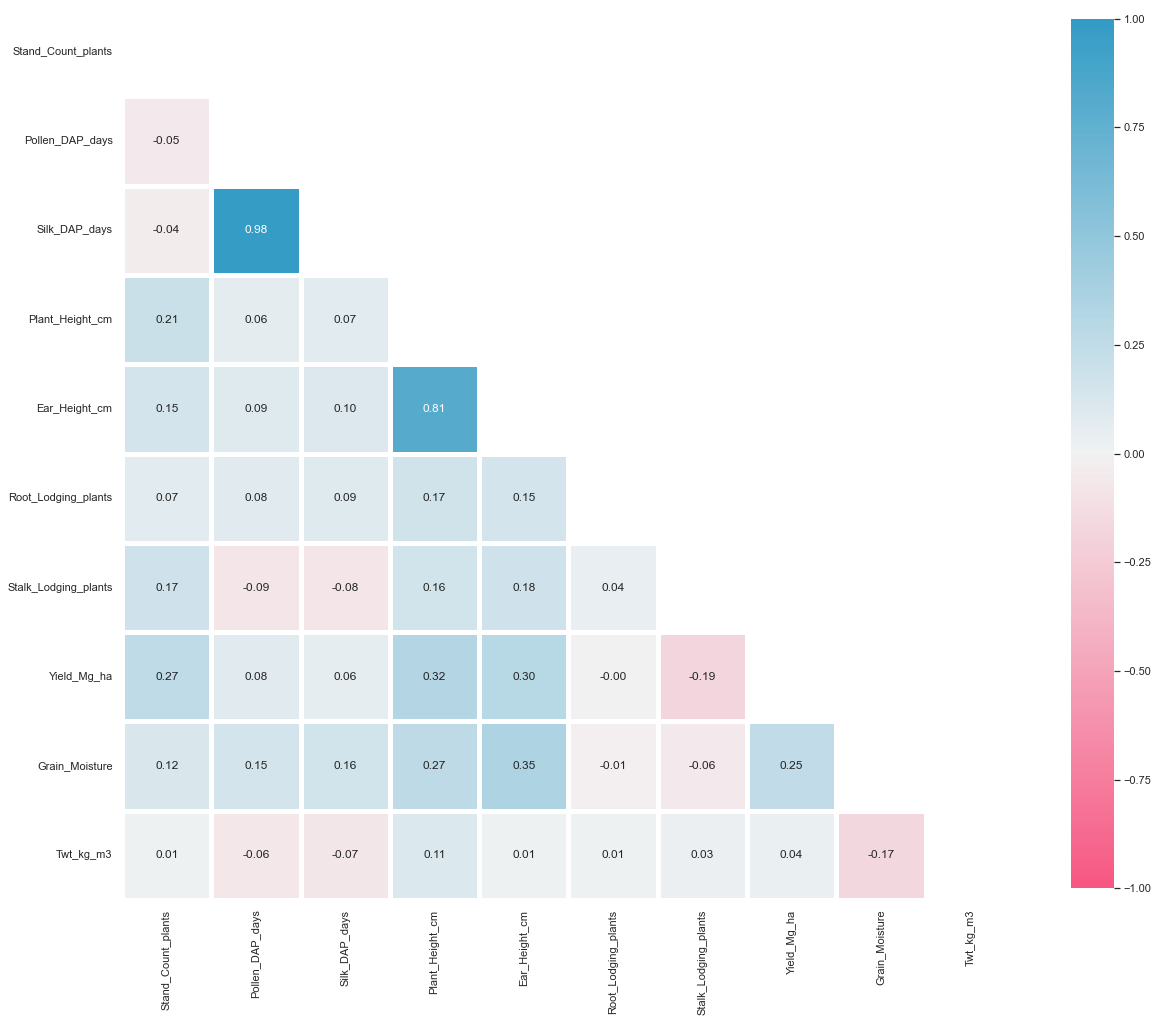

In [43]:
selected_columns = ['Stand_Count_plants', 'Pollen_DAP_days', 'Silk_DAP_days',
       'Plant_Height_cm', 'Ear_Height_cm', 'Root_Lodging_plants',
       'Stalk_Lodging_plants', 'Yield_Mg_ha', 'Grain_Moisture', 'Twt_kg_m3']

# Pearson correlation
corr = trait_training_data[selected_columns].corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linewidths=5, cmap=cmap, vmin=-1, vmax=1, cbar_kws={"shrink": .8}, square=True)


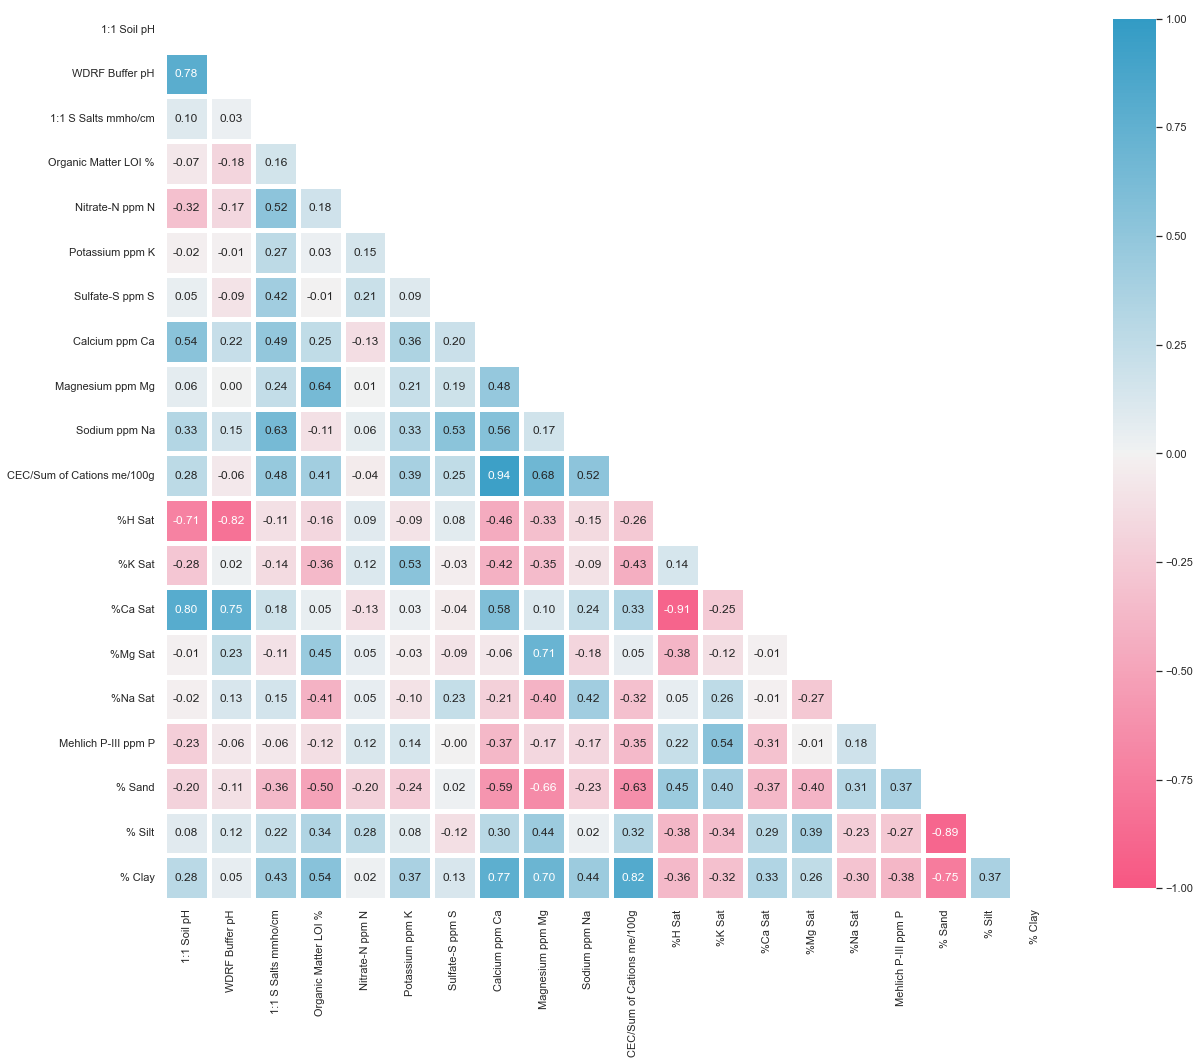

In [44]:
selected_columns = ['1:1 Soil pH', 'WDRF Buffer pH', '1:1 S Salts mmho/cm', 
       'Organic Matter LOI %', 'Nitrate-N ppm N', 'Potassium ppm K',
       'Sulfate-S ppm S', 'Calcium ppm Ca', 'Magnesium ppm Mg',
       'Sodium ppm Na', 'CEC/Sum of Cations me/100g', '%H Sat', '%K Sat',
       '%Ca Sat', '%Mg Sat', '%Na Sat', 'Mehlich P-III ppm P', '% Sand',
       '% Silt', '% Clay', 'Texture']

# Pearson correlation
corr = soil_training_data[selected_columns].corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linewidths=5, cmap=cmap, vmin=-1, vmax=1, cbar_kws={"shrink": .8}, square=True)

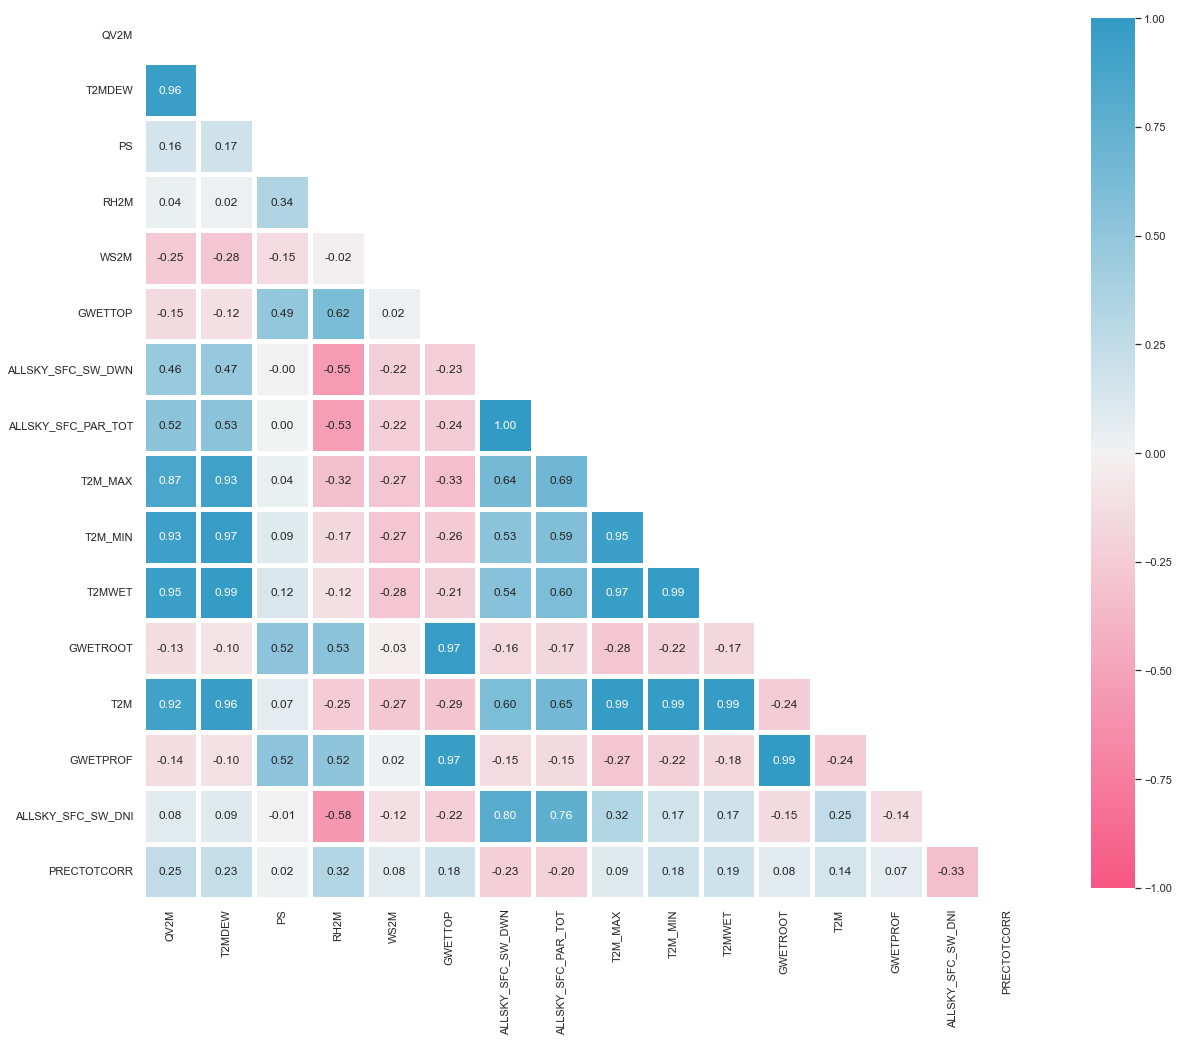

In [45]:
selected_columns = ['QV2M', 'T2MDEW', 'PS', 'RH2M', 'WS2M', 'GWETTOP',
       'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_PAR_TOT', 'T2M_MAX', 'T2M_MIN',
       'T2MWET', 'GWETROOT', 'T2M', 'GWETPROF', 'ALLSKY_SFC_SW_DNI',
       'PRECTOTCORR']

# Pearson correlation
corr = weather_training_data[selected_columns].corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linewidths=5, cmap=cmap, vmin=-1, vmax=1, cbar_kws={"shrink": .8}, square=True)

## Yield from training set

<AxesSubplot:xlabel='Yield_Mg_ha', ylabel='Count'>

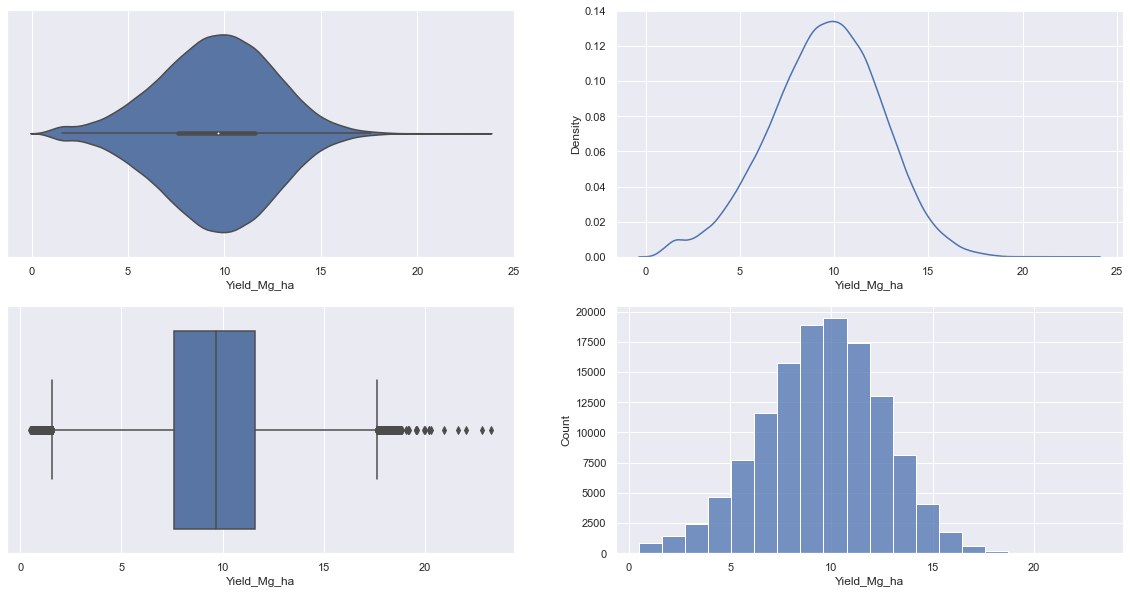

In [46]:
# Yield_Mg_ha
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20,10))

sns.violinplot(data=trait_training_data, x='Yield_Mg_ha', ax=axs[0,0])
sns.kdeplot(data=trait_training_data, x="Yield_Mg_ha", ax=axs[0,1])
sns.boxplot(data=trait_training_data, x='Yield_Mg_ha', ax=axs[1,0])
sns.histplot(data=trait_training_data, x='Yield_Mg_ha', bins=20, ax=axs[1,1])

Text(0.5, 0.98, 'Training: Yield_Mg_ha x Field_Location')

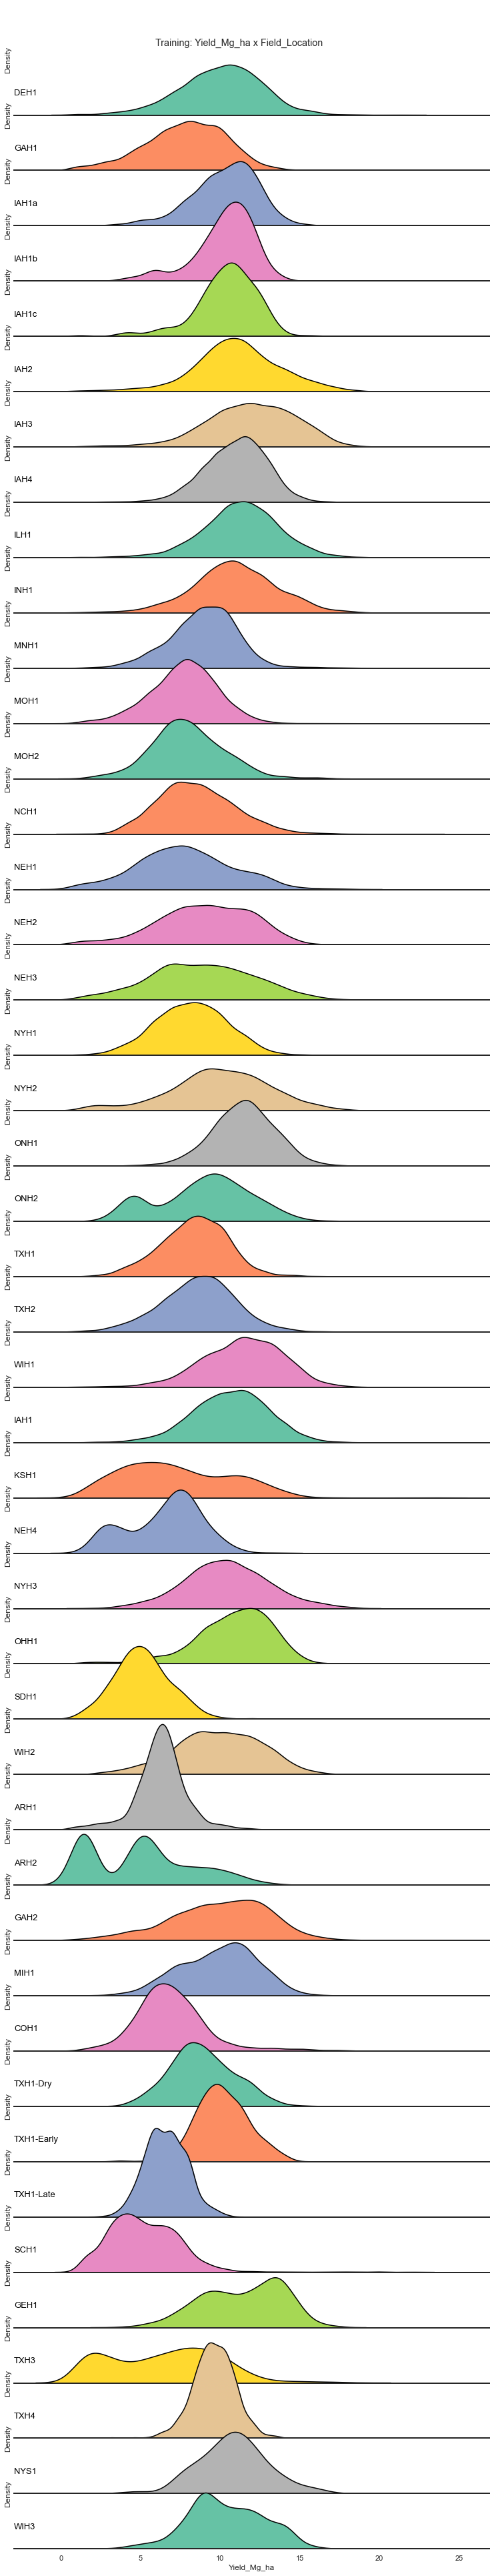

In [47]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})

palette = sns.color_palette("Set2", 12)

g = sns.FacetGrid(trait_training_data, palette=palette, row="Field_Location", hue="Field_Location", aspect=9, height=1.2)

g.map_dataframe(sns.kdeplot, x="Yield_Mg_ha", fill=True, alpha=1)

g.map_dataframe(sns.kdeplot, x="Yield_Mg_ha", color='black')

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13, ha="left", va="center", transform=ax.transAxes)
    

g.map(label, "Field_Location")

g.fig.subplots_adjust(hspace=-.5)

g.set_titles("")

g.set(yticks=[], xlabel="Yield_Mg_ha")

g.despine(left=True)

plt.suptitle('Training: Yield_Mg_ha x Field_Location', y=0.98)

Text(0.5, 0.98, 'Training: Yield_Mg_ha x Year')

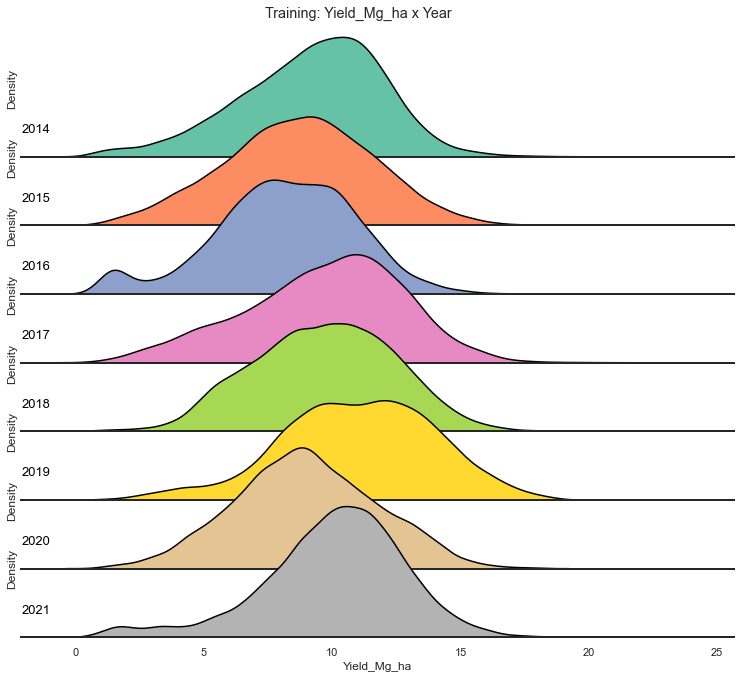

In [48]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})

palette = sns.color_palette("Set2", 12)

g = sns.FacetGrid(trait_training_data, palette=palette, row="Year", hue="Year", aspect=9, height=1.2)

g.map_dataframe(sns.kdeplot, x="Yield_Mg_ha", fill=True, alpha=1)

g.map_dataframe(sns.kdeplot, x="Yield_Mg_ha", color='black')

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13, ha="left", va="center", transform=ax.transAxes)
    

g.map(label, "Year")

g.fig.subplots_adjust(hspace=-.5)

g.set_titles("")

g.set(yticks=[], xlabel="Yield_Mg_ha")

g.despine(left=True)

plt.suptitle('Training: Yield_Mg_ha x Year', y=0.98)